<a href="https://colab.research.google.com/github/gar22891uvg/ProyectoFinalGRP4/blob/main/GRP4ProyectoFinal_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import warnings;
warnings.simplefilter('ignore')

In [4]:
import prophet
from prophet import Prophet

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Python


In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3
# loading library
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from darts import TimeSeries
from darts.models import RegressionModel
from sklearn.linear_model import LinearRegression

Proyecto Final
Grupo 4
Feature Engineering
Victor De Leon
Jaime Garcia


In [100]:
df = pd.read_csv('REC4.csv',parse_dates=True)

In [101]:
df.head(5)

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY
0,01-Nov-22,Internac,1,13997,1157375,155
1,01-Nov-22,direct1,2,9666,168465,163
2,01-Nov-22,dist1,3,9172,137949,164
3,01-Nov-22,digi1,4,3494,83306,154
4,01-Nov-22,online2,6,3251,80198,100


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5175 entries, 0 to 5174
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   FECHA    5175 non-null   object
 1   NOMBRE   5175 non-null   object
 2   CODIGO   5175 non-null   int64 
 3   TRAFICO  5175 non-null   int64 
 4   CANT     5175 non-null   int64 
 5   DELAY    5175 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 242.7+ KB


Modelacion de series de tiempo con Auto_ARIMA

In [35]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [102]:
from ast import increment_lineno
import pandas as pd
import numpy as np

#Visualizacion de los datos

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#No presentar advertencia
import warnings
warnings.filterwarnings("ignore")

#Visualizamos todas las columnas
pd.set_option('display.max_columns',None)

In [103]:
df_arima=df #Tome el dataframe original

In [104]:
df_arima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5175 entries, 0 to 5174
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   FECHA    5175 non-null   object
 1   NOMBRE   5175 non-null   object
 2   CODIGO   5175 non-null   int64 
 3   TRAFICO  5175 non-null   int64 
 4   CANT     5175 non-null   int64 
 5   DELAY    5175 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 242.7+ KB


In [105]:
df_arima = df_arima[df.NOMBRE=='Internac'][['FECHA','NOMBRE','CODIGO','TRAFICO','CANT','DELAY']] # let's focus on Internac
df_arima ['traff_x1000']= df_arima.TRAFICO/1000 # transform 
df_arima ['qty_x1000']= df_arima.CANT/1000 # transform

df_arima

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000
0,01-Nov-22,Internac,1,13997,1157375,155,13.997,1157.375
24,02-Nov-22,Internac,1,12754,1062818,187,12.754,1062.818
49,03-Nov-22,Internac,1,12441,1040217,165,12.441,1040.217
74,04-Nov-22,Internac,1,23045,1800050,145,23.045,1800.050
100,05-Nov-22,Internac,1,21942,1830014,162,21.942,1830.014
...,...,...,...,...,...,...,...,...
5049,08-May-23,Internac,1,21585,1748671,180,21.585,1748.671
5089,09-May-23,Internac,1,14133,1193611,184,14.133,1193.611
5115,10-May-23,Internac,1,14426,1215262,209,14.426,1215.262
5142,11-May-23,Internac,1,11192,946725,186,11.192,946.725


In [106]:
df_arima.head()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000
0,01-Nov-22,Internac,1,13997,1157375,155,13.997,1157.375
24,02-Nov-22,Internac,1,12754,1062818,187,12.754,1062.818
49,03-Nov-22,Internac,1,12441,1040217,165,12.441,1040.217
74,04-Nov-22,Internac,1,23045,1800050,145,23.045,1800.050
100,05-Nov-22,Internac,1,21942,1830014,162,21.942,1830.014


In [107]:
df_arima.reset_index(drop=True, inplace=True)
lag_features = ["traff_x1000", "qty_x1000"]
window1 = 3
window2 = 7
window3 = 30



In [108]:
df_rolled_3d = df_arima[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df_arima[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df_arima[lag_features].rolling(window=window3, min_periods=0)

In [109]:
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index()
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index()

df_std_3d = df_rolled_3d.std().shift(1).reset_index()
df_std_7d = df_rolled_7d.std().shift(1).reset_index()
df_std_30d = df_rolled_30d.std().shift(1).reset_index()



In [110]:
for feature in lag_features:
  df_arima[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
  df_arima[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
  df_arima[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]

  df_arima[f"{feature}_std_lag{window1}"] = df_mean_3d[feature]
  df_arima[f"{feature}_std_lag{window2}"] = df_mean_7d[feature]
  df_arima[f"{feature}_std_lag{window3}"] = df_mean_30d[feature]

df.fillna(df_arima.mean(), inplace=True)

In [111]:
df_arima.head()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30
0,01-Nov-22,Internac,1,13997,1157375,155,13.997,1157.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-Nov-22,Internac,1,12754,1062818,187,12.754,1062.818,13.9970,13.99700,13.99700,13.9970,13.99700,13.99700,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000
2,03-Nov-22,Internac,1,12441,1040217,165,12.441,1040.217,13.3755,13.37550,13.37550,13.3755,13.37550,13.37550,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500
3,04-Nov-22,Internac,1,23045,1800050,145,23.045,1800.050,13.0640,13.06400,13.06400,13.0640,13.06400,13.06400,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333
4,05-Nov-22,Internac,1,21942,1830014,162,21.942,1830.014,16.0800,15.55925,15.55925,16.0800,15.55925,15.55925,1301.028333,1265.115000,1265.115000,1301.028333,1265.115000,1265.115000


In [112]:
df_arima.tail()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30
188,08-May-23,Internac,1,21585,1748671,180,21.585,1748.671,22.264000,18.127286,18.569867,22.264000,18.127286,18.569867,1859.990667,1522.528000,1552.474067,1859.990667,1522.528000,1552.474067
189,09-May-23,Internac,1,14133,1193611,184,14.133,1193.611,22.183667,18.216286,18.592867,22.183667,18.216286,18.592867,1860.131667,1526.294143,1552.064800,1860.131667,1526.294143,1552.064800
190,10-May-23,Internac,1,14426,1215262,209,14.426,1215.262,20.003000,18.199143,18.280000,20.003000,18.199143,18.280000,1673.732667,1520.895571,1525.769200,1673.732667,1520.895571,1525.769200
191,11-May-23,Internac,1,11192,946725,186,11.192,946.725,16.714667,18.459857,18.052933,16.714667,18.459857,18.052933,1385.848000,1541.522429,1508.592767,1385.848000,1541.522429,1508.592767
192,12-May-23,Internac,1,3864,315709,192,3.864,315.709,13.250333,18.304000,17.980033,13.250333,18.304000,17.980033,1118.532667,1526.320143,1502.255967,1118.532667,1526.320143,1502.255967


In [113]:
df_arima.FECHA = pd.to_datetime(df_arima.FECHA)

In [114]:
df_arima["months"] = df_arima.FECHA.dt.month
df_arima["week"] = df_arima.FECHA.dt.week
df_arima["day"] = df_arima.FECHA.dt.day
df_arima["day_of_week"] = df_arima.FECHA.dt.day_of_week
df_arima.head()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30,months,week,day,day_of_week
0,2022-11-01,Internac,1,13997,1157375,155,13.997,1157.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,44,1,1
1,2022-11-02,Internac,1,12754,1062818,187,12.754,1062.818,13.9970,13.99700,13.99700,13.9970,13.99700,13.99700,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000,11,44,2,2
2,2022-11-03,Internac,1,12441,1040217,165,12.441,1040.217,13.3755,13.37550,13.37550,13.3755,13.37550,13.37550,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500,11,44,3,3
3,2022-11-04,Internac,1,23045,1800050,145,23.045,1800.050,13.0640,13.06400,13.06400,13.0640,13.06400,13.06400,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333,11,44,4,4
4,2022-11-05,Internac,1,21942,1830014,162,21.942,1830.014,16.0800,15.55925,15.55925,16.0800,15.55925,15.55925,1301.028333,1265.115000,1265.115000,1301.028333,1265.115000,1265.115000,11,44,5,5


In [115]:
df_arima_train = df_arima[df_arima.FECHA < "2023"]
df_arima_valid = df_arima[df_arima.FECHA >= "2023"]

In [116]:
df_arima_train

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30,months,week,day,day_of_week
0,2022-11-01,Internac,1,13997,1157375,155,13.997,1157.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,44,1,1
1,2022-11-02,Internac,1,12754,1062818,187,12.754,1062.818,13.997000,13.997000,13.997000,13.997000,13.997000,13.997000,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000,11,44,2,2
2,2022-11-03,Internac,1,12441,1040217,165,12.441,1040.217,13.375500,13.375500,13.375500,13.375500,13.375500,13.375500,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500,11,44,3,3
3,2022-11-04,Internac,1,23045,1800050,145,23.045,1800.050,13.064000,13.064000,13.064000,13.064000,13.064000,13.064000,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333,11,44,4,4
4,2022-11-05,Internac,1,21942,1830014,162,21.942,1830.014,16.080000,15.559250,15.559250,16.080000,15.559250,15.559250,1301.028333,1265.115000,1265.115000,1301.028333,1265.115000,1265.115000,11,44,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2022-12-27,Internac,1,13434,1116563,163,13.434,1116.563,20.583000,18.208000,17.811700,20.583000,18.208000,17.811700,1692.174667,1502.204857,1454.051100,1692.174667,1502.204857,1454.051100,12,52,27,1
57,2022-12-28,Internac,1,12775,1064574,153,12.775,1064.574,15.861333,18.237143,17.531033,15.861333,18.237143,17.531033,1306.765000,1500.753571,1431.151000,1306.765000,1500.753571,1431.151000,12,52,28,2
58,2022-12-29,Internac,1,12835,1070392,162,12.835,1070.392,15.989333,18.219429,17.283567,15.989333,18.219429,17.283567,1318.069667,1497.089857,1414.191000,1318.069667,1497.089857,1414.191000,12,52,29,3
59,2022-12-30,Internac,1,24781,1937444,143,24.781,1937.444,13.014667,18.125000,17.283467,13.014667,18.125000,17.283467,1083.843000,1486.812000,1414.863600,1083.843000,1486.812000,1414.863600,12,52,30,4


In [117]:
df_arima_train.head()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30,months,week,day,day_of_week
0,2022-11-01,Internac,1,13997,1157375,155,13.997,1157.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,44,1,1
1,2022-11-02,Internac,1,12754,1062818,187,12.754,1062.818,13.9970,13.99700,13.99700,13.9970,13.99700,13.99700,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000,11,44,2,2
2,2022-11-03,Internac,1,12441,1040217,165,12.441,1040.217,13.3755,13.37550,13.37550,13.3755,13.37550,13.37550,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500,11,44,3,3
3,2022-11-04,Internac,1,23045,1800050,145,23.045,1800.050,13.0640,13.06400,13.06400,13.0640,13.06400,13.06400,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333,11,44,4,4
4,2022-11-05,Internac,1,21942,1830014,162,21.942,1830.014,16.0800,15.55925,15.55925,16.0800,15.55925,15.55925,1301.028333,1265.115000,1265.115000,1301.028333,1265.115000,1265.115000,11,44,5,5


In [118]:
df_arima_train.tail()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30,months,week,day,day_of_week
56,2022-12-27,Internac,1,13434,1116563,163,13.434,1116.563,20.583000,18.208000,17.811700,20.583000,18.208000,17.811700,1692.174667,1502.204857,1454.051100,1692.174667,1502.204857,1454.051100,12,52,27,1
57,2022-12-28,Internac,1,12775,1064574,153,12.775,1064.574,15.861333,18.237143,17.531033,15.861333,18.237143,17.531033,1306.765000,1500.753571,1431.151000,1306.765000,1500.753571,1431.151000,12,52,28,2
58,2022-12-29,Internac,1,12835,1070392,162,12.835,1070.392,15.989333,18.219429,17.283567,15.989333,18.219429,17.283567,1318.069667,1497.089857,1414.191000,1318.069667,1497.089857,1414.191000,12,52,29,3
59,2022-12-30,Internac,1,24781,1937444,143,24.781,1937.444,13.014667,18.125000,17.283467,13.014667,18.125000,17.283467,1083.843000,1486.812000,1414.863600,1083.843000,1486.812000,1414.863600,12,52,30,4
60,2022-12-31,Internac,1,26302,2113032,166,26.302,2113.032,16.797000,17.939143,17.702033,16.797000,17.939143,17.702033,1357.470000,1466.499571,1445.997133,1357.470000,1466.499571,1445.997133,12,52,31,5


In [126]:
df_arima_valid.head()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30,months,week,day,day_of_week,Forecast_ARIMAX
61,2023-01-01,Internac,1,12886,1053814,154,12.886,1053.814,21.306000,17.753857,18.183467,21.306000,17.753857,18.183467,1706.956000,1443.676714,1483.406933,1706.956000,1443.676714,1483.406933,1,52,1,6,1642.149372
62,2023-01-02,Internac,1,20836,1677881,159,20.836,1677.881,21.323000,17.824571,17.886767,21.323000,17.824571,17.886767,1701.430000,1446.984429,1461.803167,1701.430000,1446.984429,1461.803167,1,1,2,0,1189.535448
63,2023-01-03,Internac,1,12790,1078556,152,12.790,1078.556,20.008000,17.692714,17.910233,20.008000,17.692714,17.910233,1614.909000,1433.385714,1462.603567,1614.909000,1433.385714,1462.603567,1,1,3,1,1264.110872
64,2023-01-04,Internac,1,12119,1009053,164,12.119,1009.053,15.504000,17.600714,17.574100,15.504000,17.600714,17.574100,1270.083667,1427.956143,1435.397633,1270.083667,1427.956143,1435.397633,1,1,4,2,1448.578410
65,2023-01-05,Internac,1,11632,971471,154,11.632,971.471,15.248333,17.507000,17.296033,15.248333,17.507000,17.296033,1255.163333,1420.024571,1415.066867,1255.163333,1420.024571,1415.066867,1,1,5,3,1466.876464


In [127]:
df_arima_valid.tail()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30,months,week,day,day_of_week,Forecast_ARIMAX
188,2023-05-08,Internac,1,21585,1748671,180,21.585,1748.671,22.264000,18.127286,18.569867,22.264000,18.127286,18.569867,1859.990667,1522.528000,1552.474067,1859.990667,1522.528000,1552.474067,5,19,8,0,1466.876464
189,2023-05-09,Internac,1,14133,1193611,184,14.133,1193.611,22.183667,18.216286,18.592867,22.183667,18.216286,18.592867,1860.131667,1526.294143,1552.064800,1860.131667,1526.294143,1552.064800,5,19,9,1,1466.876464
190,2023-05-10,Internac,1,14426,1215262,209,14.426,1215.262,20.003000,18.199143,18.280000,20.003000,18.199143,18.280000,1673.732667,1520.895571,1525.769200,1673.732667,1520.895571,1525.769200,5,19,10,2,1466.876464
191,2023-05-11,Internac,1,11192,946725,186,11.192,946.725,16.714667,18.459857,18.052933,16.714667,18.459857,18.052933,1385.848000,1541.522429,1508.592767,1385.848000,1541.522429,1508.592767,5,19,11,3,1466.876464
192,2023-05-12,Internac,1,3864,315709,192,3.864,315.709,13.250333,18.304000,17.980033,13.250333,18.304000,17.980033,1118.532667,1526.320143,1502.255967,1118.532667,1526.320143,1502.255967,5,19,12,4,1466.876464


In [119]:
exogenous_features = ["traff_x1000_mean_lag3","traff_x1000_mean_lag7","traff_x1000_mean_lag30",
                      "traff_x1000_std_lag3","traff_x1000_std_lag7","traff_x1000_std_lag30",
                      "qty_x1000_mean_lag3","qty_x1000_mean_lag7", "qty_x1000_mean_lag30",
                      "qty_x1000_std_lag3", "qty_x1000_std_lag7", "qty_x1000_std_lag30",
                      "months", "week", "day", "day_of_week"]

In [132]:
from pmdarima import auto_arima

In [133]:
model = auto_arima(df_arima_train.qty_x1000, exogenous=df_arima_train[exogenous_features],trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_arima_train.qty_x1000,exogenous=df_arima_train[exogenous_features])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=906.665, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=899.390, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=897.750, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1069.323, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=899.392, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=894.733, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=895.625, Time=0.12 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=881.341, Time=0.20 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=881.171, Time=0.31 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=888.529, Time=0.37 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=882.941, Time=0.52 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=inf, Time=0.17 s

ARIMA(order=(0, 0, 4), scoring_args={}, suppress_warnings=True)

In [142]:
forecast = model.predict(n_periods=len(df_arima_valid), exogenous=df_arima_valid[exogenous_features])
df_arima_valid["Forecast_ARIMAX"] = forecast

El modelo ARIMA más adecuado es ARIMA (1,0,0) que tiene el AIC más bajo

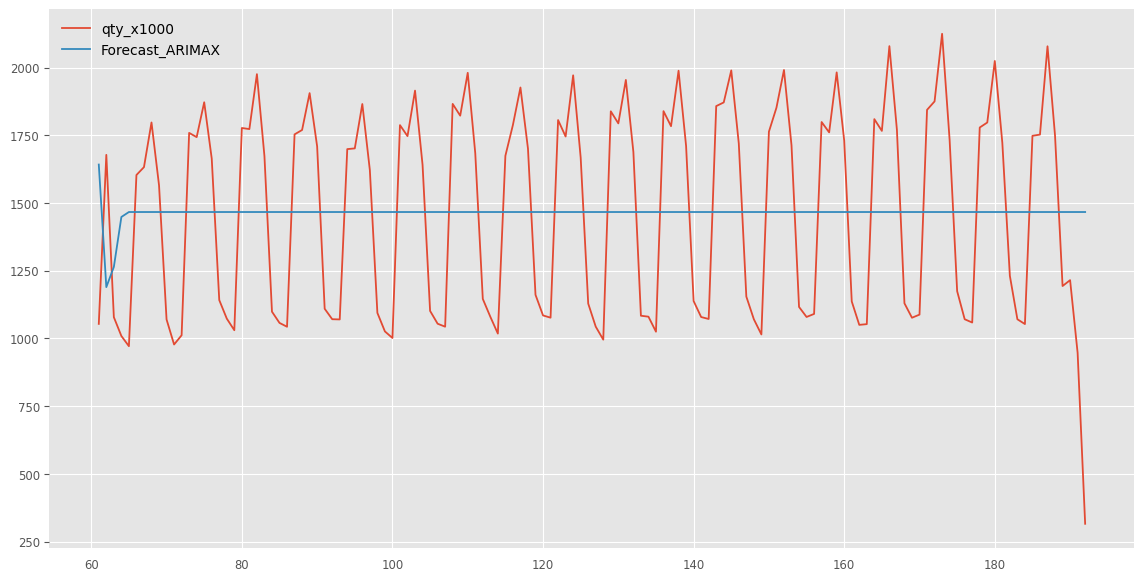

In [143]:
df_arima_valid[["qty_x1000","Forecast_ARIMAX"]].plot(figsize=(14,7));

In [144]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [145]:
print("RMMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_arima_valid.qty_x1000, df_arima_valid.Forecast_ARIMAX)))
print("MAE of Auto ARIMAX:", mean_squared_error(df_arima_valid.qty_x1000, df_arima_valid.Forecast_ARIMAX))

RMMSE of Auto ARIMAX: 387.25818606875106
MAE of Auto ARIMAX: 149968.90267725944


In [152]:
another_model = auto_arima(df_arima["qty_x1000"],start_p=1, start_q=1,
                          max_p=6,max_q=6, m=12,
                          start_P=0, seasonal=True,
                          d=1, D=1, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.36 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2802.208, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2784.924, Time=0.60 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.66 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2796.218, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=2.46 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.80 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=1.08 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=2642.977, Time=4.03 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=2642.622, Time=3.45 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=4.07 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=6.42 sec
 ARIMA(2,1,0)(2,1,2)[12]             : AIC=inf, Time=6.13 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=inf, Time=9.63 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=inf, Time=7.14 sec
 A

In [153]:
another_model.fit(df_arima_train.qty_x1000,exogenous=df_arima_train[exogenous_features])

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [154]:
forecast2 = another_model.predict(n_periods=len(df_arima_valid),exogenous=df_arima_valid[exogenous_features])
df_arima_valid["Forecast_SARIMA"] = forecast2

<Axes: >

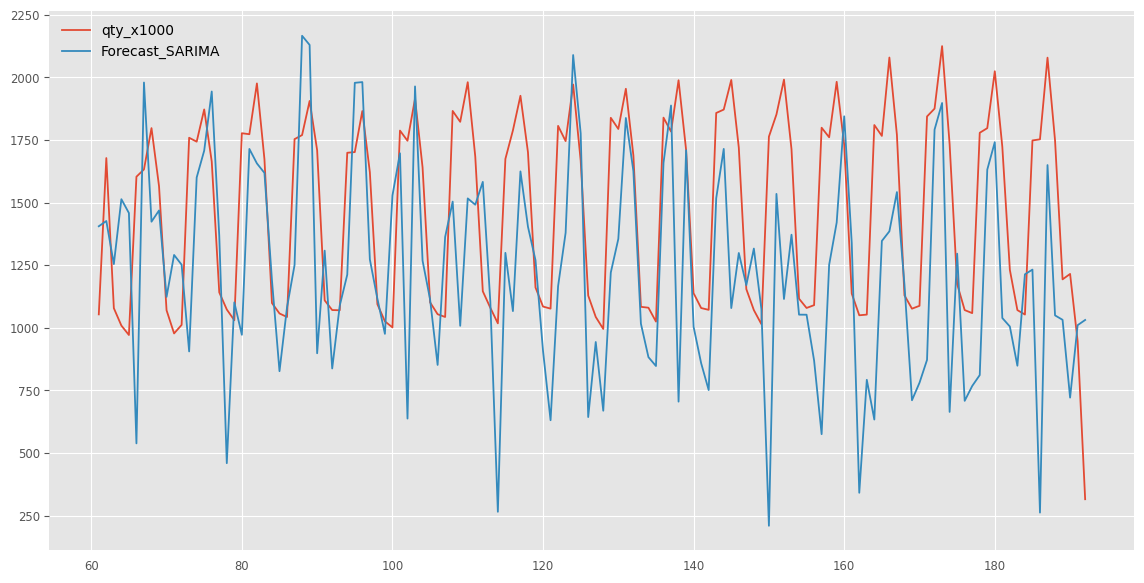

In [155]:
df_arima_valid[["qty_x1000","Forecast_SARIMA"]].plot(figsize=(14,7))

In [156]:
print("RMMSE of Auto SARIMA:", np.sqrt(mean_squared_error(df_arima_valid.qty_x1000, df_arima_valid.Forecast_SARIMA)))
print("nMAE of Auto SARIMA:", mean_absolute_error(df_arima_valid.qty_x1000, df_arima_valid.Forecast_SARIMA))

RMMSE of Auto SARIMA: 490.93127236235995
nMAE of Auto SARIMA: 370.304452912778


Modelacion de Serie de Tiempo con Prophet

In [176]:
df_arima['ds']= df_int['year'].apply('{:0>2d}'.format) +'-' + df_int['month'].apply('{:0>2d}'.format)+'-'+df_int['day'].apply('{:0>2d}'.format) # To create a format mm-dd
df_arima

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30,months,week,day,day_of_week,ds
0,2022-11-01,Internac,1,13997,1157375,155,13.997,1157.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,44,1,1,2022-11-01
1,2022-11-02,Internac,1,12754,1062818,187,12.754,1062.818,13.997000,13.997000,13.997000,13.997000,13.997000,13.997000,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000,11,44,2,2,2022-11-02
2,2022-11-03,Internac,1,12441,1040217,165,12.441,1040.217,13.375500,13.375500,13.375500,13.375500,13.375500,13.375500,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500,11,44,3,3,2022-11-03
3,2022-11-04,Internac,1,23045,1800050,145,23.045,1800.050,13.064000,13.064000,13.064000,13.064000,13.064000,13.064000,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333,11,44,4,4,2022-11-04
4,2022-11-05,Internac,1,21942,1830014,162,21.942,1830.014,16.080000,15.559250,15.559250,16.080000,15.559250,15.559250,1301.028333,1265.115000,1265.115000,1301.028333,1265.115000,1265.115000,11,44,5,5,2022-11-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2023-05-08,Internac,1,21585,1748671,180,21.585,1748.671,22.264000,18.127286,18.569867,22.264000,18.127286,18.569867,1859.990667,1522.528000,1552.474067,1859.990667,1522.528000,1552.474067,5,19,8,0,2023-05-08
189,2023-05-09,Internac,1,14133,1193611,184,14.133,1193.611,22.183667,18.216286,18.592867,22.183667,18.216286,18.592867,1860.131667,1526.294143,1552.064800,1860.131667,1526.294143,1552.064800,5,19,9,1,2023-05-09
190,2023-05-10,Internac,1,14426,1215262,209,14.426,1215.262,20.003000,18.199143,18.280000,20.003000,18.199143,18.280000,1673.732667,1520.895571,1525.769200,1673.732667,1520.895571,1525.769200,5,19,10,2,2023-05-10
191,2023-05-11,Internac,1,11192,946725,186,11.192,946.725,16.714667,18.459857,18.052933,16.714667,18.459857,18.052933,1385.848000,1541.522429,1508.592767,1385.848000,1541.522429,1508.592767,5,19,11,3,2023-05-11


In [177]:
pred = df_arima[['qty_x1000','ds']]
pred.columns = ['y','ds']

In [178]:
pred.head()

,y,ds
0,1157.375,2022-11-01
1,1062.818,2022-11-02
2,1040.217,2022-11-03
3,1800.050,2022-11-04
4,1830.014,2022-11-05


In [179]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(pred)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdumh_uj4/0d8bh5kw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdumh_uj4/87d7yfc6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19156', 'data', 'file=/tmp/tmpdumh_uj4/0d8bh5kw.json', 'init=/tmp/tmpdumh_uj4/87d7yfc6.json', 'output', 'file=/tmp/tmpdumh_uj4/prophet_modelb2vnczgk/prophet_model-20230528051738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:17:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:17:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [180]:
future = m.make_future_dataframe(periods=365, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-01,1218.886986,830.538713,1434.856903,1218.886986,1218.886986,-104.673054,-104.673054,-104.673054,252.195364,252.195364,252.195364,-356.868418,-356.868418,-356.868418,0.0,0.0,0.0,1114.213932
1,2022-11-02,1218.865364,722.772876,1359.801409,1218.865364,1218.865364,-162.969902,-162.969902,-162.969902,252.195364,252.195364,252.195364,-415.165267,-415.165267,-415.165267,0.0,0.0,0.0,1055.895461
2,2022-11-03,1218.843742,738.362128,1333.974005,1218.843742,1218.843742,-181.619400,-181.619400,-181.619400,252.195364,252.195364,252.195364,-433.814764,-433.814764,-433.814764,0.0,0.0,0.0,1037.224343
3,2022-11-04,1218.822121,1442.945500,2037.020748,1218.822121,1218.822121,516.784237,516.784237,516.784237,252.195364,252.195364,252.195364,264.588872,264.588872,264.588872,0.0,0.0,0.0,1735.606357
4,2022-11-05,1218.800499,1487.189632,2101.343797,1218.800499,1218.800499,565.519855,565.519855,565.519855,252.195364,252.195364,252.195364,313.324491,313.324491,313.324491,0.0,0.0,0.0,1784.320354


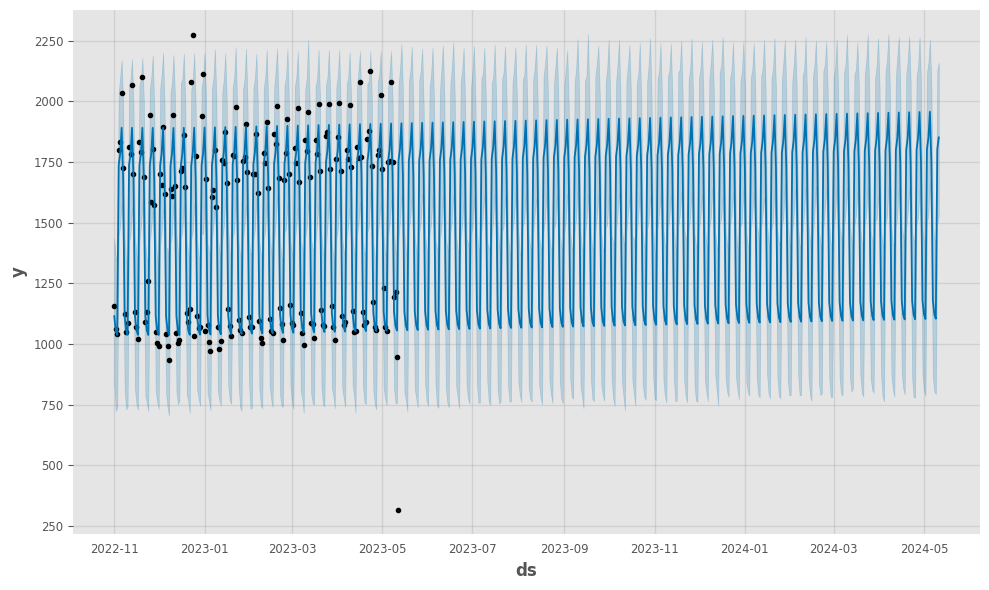

In [181]:
plot1 = m.plot(forecast)

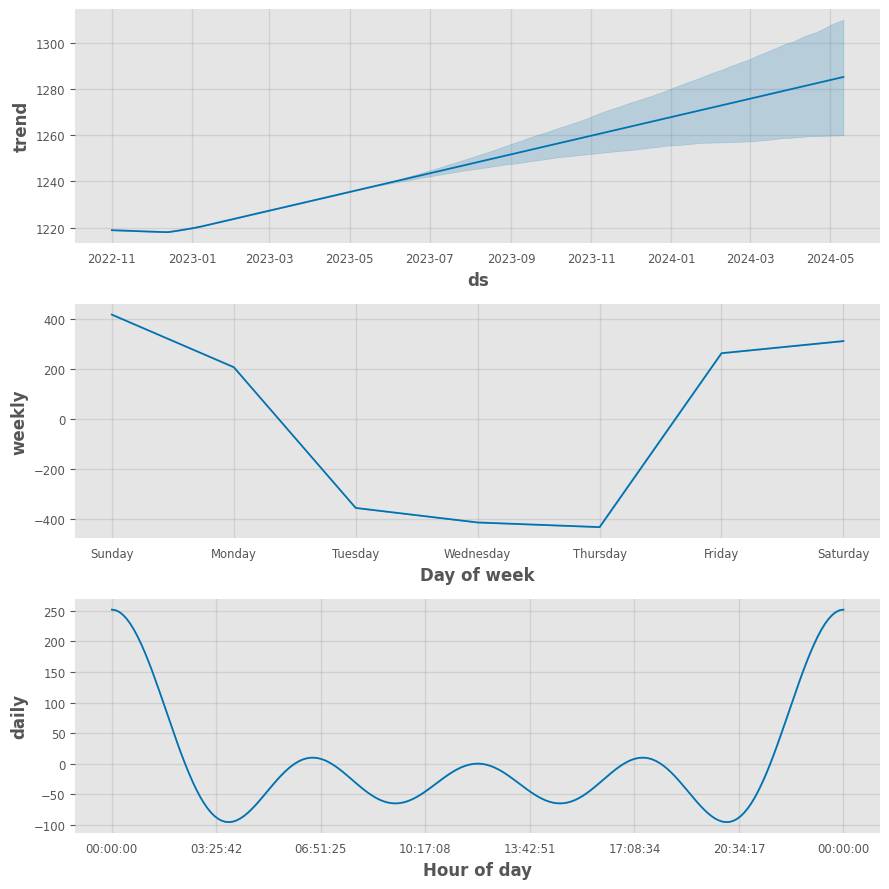

In [182]:
plot2=m.plot_components(forecast)

In [188]:
m2 = Prophet(interval_width=0.95, weekly_seasonality=True, daily_seasonality=False)
model2 = m2.fit(pred)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdumh_uj4/3pstqs9n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdumh_uj4/y3sirs5j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18894', 'data', 'file=/tmp/tmpdumh_uj4/3pstqs9n.json', 'init=/tmp/tmpdumh_uj4/y3sirs5j.json', 'output', 'file=/tmp/tmpdumh_uj4/prophet_modelex9sia5v/prophet_model-20230528051946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:19:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:19:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [189]:
future2 = m2.make_future_dataframe(periods=365, freq='D')
forecast2 = m2.predict(future2)
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-01,1469.855497,818.050244,1414.153246,1469.855497,1469.855497,-356.868558,-356.868558,-356.868558,-356.868558,-356.868558,-356.868558,0.0,0.0,0.0,1112.986939
1,2022-11-02,1469.834471,754.419554,1364.416268,1469.834471,1469.834471,-415.152098,-415.152098,-415.152098,-415.152098,-415.152098,-415.152098,0.0,0.0,0.0,1054.682373
2,2022-11-03,1469.813445,726.232535,1353.634567,1469.813445,1469.813445,-433.782467,-433.782467,-433.782467,-433.782467,-433.782467,-433.782467,0.0,0.0,0.0,1036.030978
3,2022-11-04,1469.792420,1421.381900,2049.024283,1469.792420,1469.792420,264.681853,264.681853,264.681853,264.681853,264.681853,264.681853,0.0,0.0,0.0,1734.474273
4,2022-11-05,1469.771394,1484.598429,2105.389224,1469.771394,1469.771394,313.265298,313.265298,313.265298,313.265298,313.265298,313.265298,0.0,0.0,0.0,1783.036692


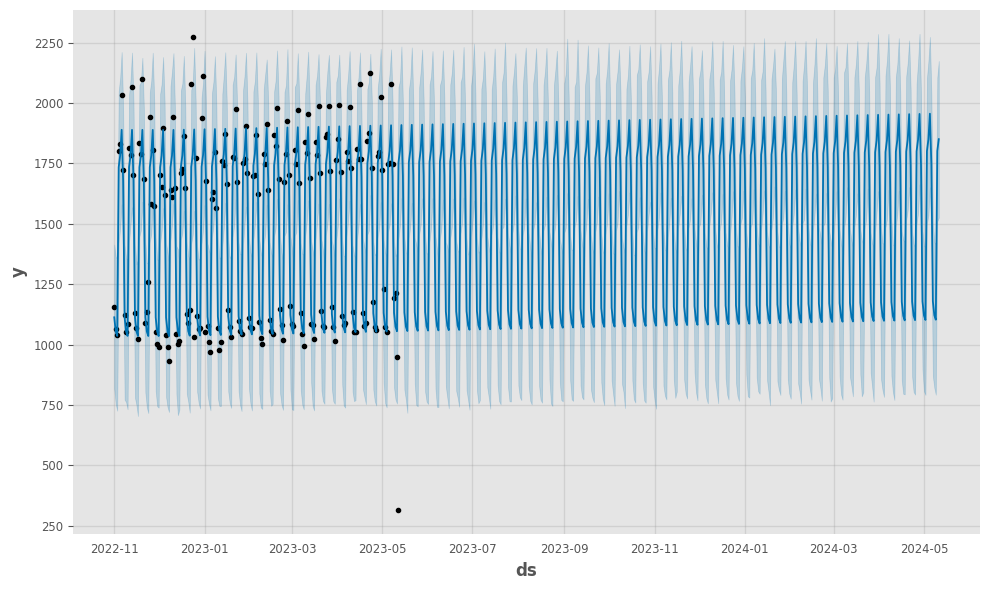

In [190]:
plot3 = m2.plot(forecast2)

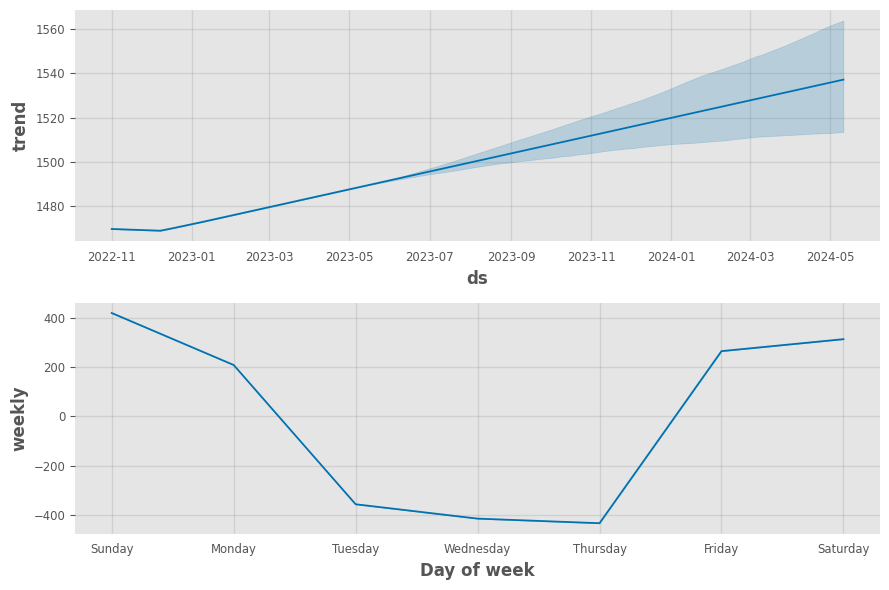

In [191]:
plot4=m2.plot_components(forecast2)